# Composite plotting

Integrate point data with a striplog log for analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import striplog
striplog.__version__

'0.7.0'

In [2]:
from striplog import Legend, Lexicon, Interval, Component

In [3]:
legend = Legend.builtin('nsdoe')

# Make a `striplog` 

In [4]:
from striplog import Striplog
imgfile = "data/images/P-129_280_1935.png"

In [5]:
top, base = 280.0, 1935.0
strip = Striplog.from_image(imgfile, top, base, legend=legend)
strip

Striplog(185 Intervals, start=280.0, stop=1935.0)

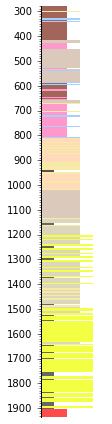

In [6]:
strip.plot(legend, ladder=True, aspect=4)

# Make a `well`

In [7]:
import welly
from welly import Well
welly.__version__

'0.1.0'

In [8]:
lasfile = 'data/las/P-129_out.LAS'
w = Well.from_las(lasfile)

# Add striplog to well

In [9]:
w.data['strip'] = strip

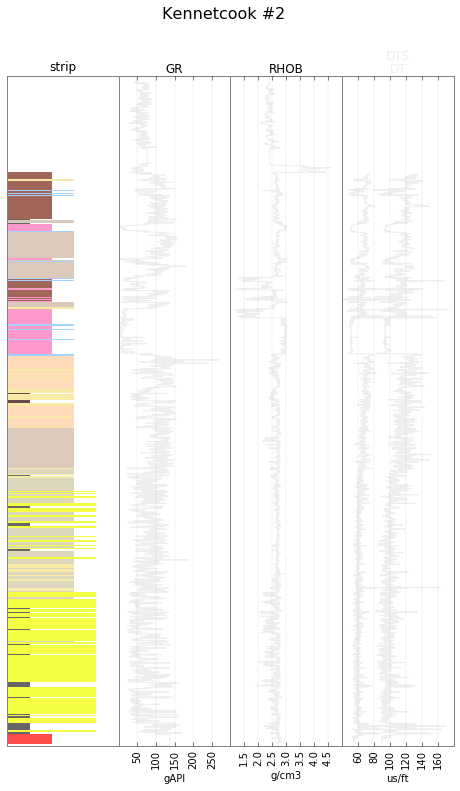

In [10]:
tracks = ['strip', 'GR', 'RHOB', ['DT', 'DTS']]
w.plot(tracks=tracks, legend=legend)

Notice how all the logs are greyed out, that is because we aren't telling the `well.plot()` method what their styles are.

# Get template for petrophysical legend

In [11]:
#curve_template = 'data/templates/Petrophysics_display_template.csv'

In [12]:
curve_legend_csv = """colour,lw,xscale,curve mnemonic
black,1.0,linear,GR
#000000,1.0,log,RLA5
darkred,1.0,linear,RHOB
blue,1.0,linear,DT
green,1.0,linear,DTS
"""
curve_legend = Legend.from_csv(curve_legend_csv)

In [13]:
complete_legend = legend + curve_legend

In [14]:
complete_legend.get_decor(w.data['GR'])

colour,#000000
width,None
hatch,None
curve,{'mnemonic': 'gr'}
lw,1.0
xscale,linear


# Add the curve's legend to the `nsdoe` legend

Use the `well.plot()` method to specific create a view of of `tracks`

Let's try it again

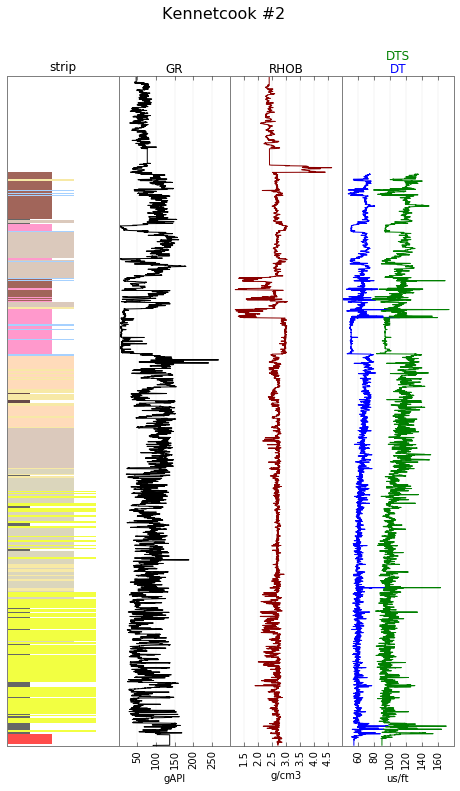

In [15]:
tracks = ['strip', 'GR', 'RHOB', ['DT', 'DTS']]
w.plot(tracks=tracks, legend=complete_legend)